In [226]:
import pandas as pd
import numpy as np

In [227]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [228]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
from geopy.geocoders import Nominatim

In [229]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, n_splits = 10):   
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

In [230]:
import requests
from bs4 import BeautifulSoup

## Import Chicago crime data from DB2

In [231]:

from ibmdbpy import IdaDataBase, IdaDataFrame

# @hidden_cell
# This connection object is used to access your data and contains your credentials.
# You might want to remove those credentials before you share your notebook.
idadb_5b0665e0642449baaf3f665b986ae869 = IdaDataBase(dsn='DASHDB;Database=BLUDB;Hostname=dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net;Port=50000;PROTOCOL=TCPIP;UID=ppw47163;PWD=l69d0ww9rpn-03xr')

crime = IdaDataFrame(idadb_5b0665e0642449baaf3f665b986ae869, 'PPW47163.CHICAGO_CRIME_DATA').as_dataframe()
crime.head()

# You can close the database connection with the following code. Please keep the comment line with the @hidden_cell tag,
# because the close function displays parts of the credentials.
# @hidden_cell
#idadb_5b0665e0642449baaf3f665b986ae869.close()
# To learn more about the ibmdby package, please read the documentation: http://pythonhosted.org/ibmdbpy/


,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,2018-02-10 15:50:01,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,2018-02-28 15:56:25,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,2018-02-10 15:50:01,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,2018-02-10 15:50:01,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,2018-02-10 15:50:01,41.773455,-87.706480,"(41.773455295, -87.706480471)"


## Modifying the data frame

In [232]:
df = crime[['CASE_NUMBER', 'DATE', 'BLOCK', 'PRIMARY_TYPE', 'WARD', 'LATITUDE', 'LONGITUDE'
]]


In [233]:
df['DATE'] =  pd.to_datetime(df['DATE'], format='%m/%d/%Y %I:%M:%S %p')


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [234]:
df['HOUR'] = df['DATE'].dt.hour
df['DAY'] = df['DATE'].dt.day_name()
df['DAY_N'] = df['DATE'].dt.dayofweek + 1 #day number
df['MONTH_N'] = df['DATE'].dt.month_name() #month number
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [235]:

df.dropna(inplace=True)
df.reindex()
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,CASE_NUMBER,DATE,BLOCK,PRIMARY_TYPE,WARD,LATITUDE,LONGITUDE,HOUR,DAY,DAY_N,MONTH_N,MONTH,YEAR,YEAR_MONTH
0,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,THEFT,14.0,41.807440,-87.703956,17,Saturday,6,August,8,2004,2004-08
1,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,THEFT,27.0,41.898280,-87.716406,12,Saturday,6,June,6,2004,2004-06
2,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,THEFT,3.0,41.815933,-87.624642,5,Monday,1,April,4,2011,2011-04
3,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,THEFT,7.0,41.743665,-87.562463,16,Thursday,4,December,12,2010,2010-12
4,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,THEFT,15.0,41.773455,-87.706480,19,Tuesday,2,February,2,2016,2016-02


Text(0.0, 1.0, 'Count of Cases Per Month')

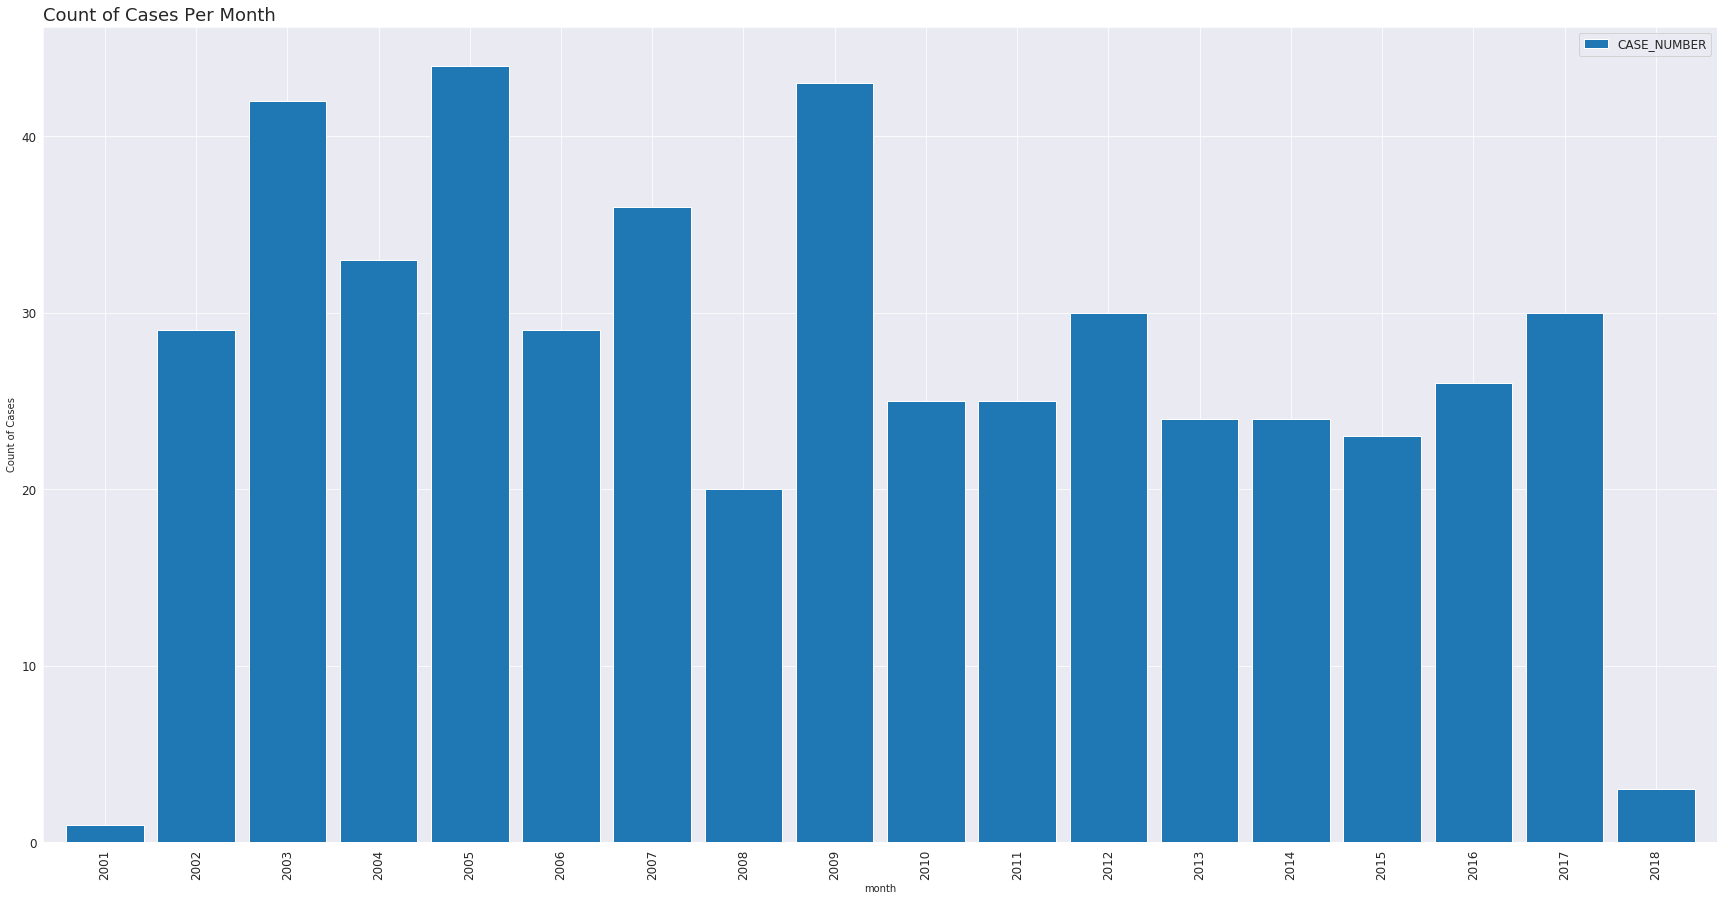

In [236]:
df.groupby('YEAR').count().plot(y = 'CASE_NUMBER', 
                                      kind='bar',
                                      figsize=(30,15),
                                      width=0.85,
                                      fontsize=12,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

In [237]:
top_crimes = df[['PRIMARY_TYPE', 'CASE_NUMBER']].groupby(
    ['PRIMARY_TYPE']).count().sort_values('CASE_NUMBER', ascending=False)[:10].axes[0].tolist()

top_three_crimes = df[['PRIMARY_TYPE', 'CASE_NUMBER']].groupby(
    ['PRIMARY_TYPE']).count().sort_values('CASE_NUMBER', ascending=False)[:3].axes[0].tolist()
top_two_crimes = df[['PRIMARY_TYPE', 'CASE_NUMBER']].groupby(
    ['PRIMARY_TYPE']).count().sort_values('CASE_NUMBER', ascending=False)[:3].axes[0].tolist()

df_top_crimes = df[df['PRIMARY_TYPE'].isin(top_crimes)].copy()
df_top3_crimes = df[df['PRIMARY_TYPE'].isin(top_three_crimes)].copy()


## Map with crime spots for one month

In [246]:

df_top_crimes_august = df_top_crimes[df_top_crimes.MONTH_N == 'August']

# Define Chicago's geolocation coordinates
chicago_latitude = 41.85  
chicago_longitude = -87.75

# Define the world map centered around Chicago with a higher zoom level
chicago_map = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng in zip(df_top_crimes_august.LATITUDE, 
                         df_top_crimes_august.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
chicago_map.add_child(incidents)

In [247]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
cluster = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.LATITUDE,  row.LONGITUDE],
                 popup=row.PRIMARY_TYPE))

cluster.add_child(mc)
cluster

## Data prep for modeling

In [130]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['LATITUDE', 'LONGITUDE']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top_crimes.HOUR, prefix = 'hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.DAY_N))
df_features = df_features.join(pd.get_dummies(df_top_crimes.MONTH_N))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['WARD'] = df_top_crimes[['WARD']]
df_features['CRIMES'] = df_top_crimes[['PRIMARY_TYPE']]

In [131]:
df_features.head()

,LATITUDE,LONGITUDE,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,1,2,3,4,5,6,7,April,August,December,February,January,July,June,March,May,November,October,September,WARD,CRIMES
0,41.807440,-87.703956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,14.0,THEFT
1,41.898280,-87.716406,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,27.0,THEFT
2,41.815933,-87.624642,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,THEFT
3,41.743665,-87.562463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7.0,THEFT
4,41.773455,-87.706480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0,THEFT


In [132]:
df_features_3 = df_features[df_features['CRIMES'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['CRIMES'].isin(top_two_crimes)].copy()

In [134]:
X_10 = df_features.copy()
y_10 = X_10.CRIMES.values

X_10.drop('CRIMES', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.CRIMES.values

X_3.drop('CRIMES', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.CRIMES.values

X_2.drop('CRIMES', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted 

In [135]:
# Set X = X_10
X = X_10
y = y_10

In [136]:
# Set X = X_2
X = X_2
y = y_2

In [137]:
# Set X = X_3
X = X_3
y = y_3

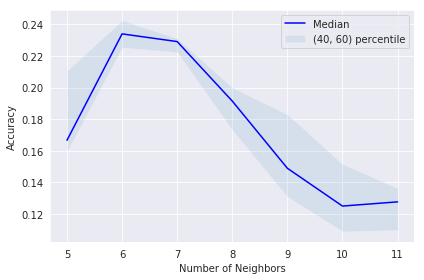

In [148]:
from datetime import datetime
neighs = range(5, 12)

# Store the scores
scores = np.zeros((len(neighs), 3))

for idx, neigh in enumerate(neighs):
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 5)

plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

## import foursquare data

In [150]:
page = requests.get("https://foursquare.com/explore?mode=url&near=Chicago%2C%20IL%2C%20United%20States&nearGeoId=72057594042815334&q=Top%20Picks")

soup = BeautifulSoup(page.content, 'html.parser')
top_venues = soup.find_all('div', class_='venueDetails')

In [176]:
CLIENT_ID = 'TEF1PBCLB02YAMTXWUNGVOARIPHXFF3XNGJAAOUIU1UMBA3A'
CLIENT_SECRET = 'JB21DGYIXQF25B5P0DPOWRWPTFB2RPWJWQ3YWZFOFPX4AD4V'
VERSION = '20180605'

In [177]:
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'postalcode',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude']

df_top_venues = pd.DataFrame(columns=venue_columns)

for venue in top_venues:
    venue_name = venue.find(target="_blank").get_text()
    venue_score = venue.find(class_="venueScore positive").get_text()
    venue_cat = venue.find(class_="categoryName").get_text()
    venue_href = venue.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]

    if 'promotedTipId' in venue_id: 
        continue
        
    # Get the properly formatted address and the latitude and longitude
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, 
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION)
        
    
    result = requests.get(url).json()
    #print(result)
    venue_address = result['response']['venue']['location']['address']
    venue_postalcode = result['response']['venue']['location']['postalCode']
    venue_city = result['response']['venue']['location']['city']
    venue_latitude = result['response']['venue']['location']['lat']
    venue_longitude = result['response']['venue']['location']['lng']
    
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'address': venue_address,
                                          'postalcode': venue_postalcode,
                                          'city': venue_city,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude}, ignore_index=True)

## Top venues in Chicago

In [180]:
df_top_venues['score'] = pd.to_numeric(df_top_venues['score'], errors='coerce').fillna(0)

In [181]:
df_top_venues.head()

,id,score,category,name,address,postalcode,city,href,latitude,longitude
0,42b75880f964a52090251fe3,9.6,Park,Millennium Park,201 E Randolph St,60601,Chicago,/v/millennium-park/42b75880f964a52090251fe3,41.883112,-87.623851
1,49e9ef74f964a52011661fe3,9.5,Art Museum,The Art Institute of Chicago,111 S Michigan Ave,60603,Chicago,/v/the-art-institute-of-chicago/49e9ef74f964a5...,41.879610,-87.623552
2,4c47533649fa9521cb1f5e62,9.5,Park,Grant Park,337 E Randolph Dr,60601,Chicago,/v/grant-park/4c47533649fa9521cb1f5e62,41.876626,-87.619263
3,4b9d15c5f964a520478e36e3,9.5,Waterfront,Chicago Riverwalk,Chicago River,60601,Chicago,/v/chicago-riverwalk/4b9d15c5f964a520478e36e3,41.887280,-87.627217
4,4adfca6df964a520777d21e3,9.5,Concert Hall,Symphony Center (Chicago Symphony Orchestra),220 S Michigan Ave,60604,Chicago,/v/symphony-center-chicago-symphony-orchestra/...,41.879275,-87.624680
